# **K-neighbors contribute equally**

K = 1: [0.04313866295597777, 1.0189318045040052, 1.652789858383104, 1.8765819889539446, 2.1821120545769896]
K = 3: [0.08998631905569791, 1.0222970700483858, 1.6179171466612037, 1.930453395356551, 2.2438056449881754]
K = 50: [1.0254862356686156, 1.0254862356686154, 1.6545859654363044, 1.902818812219191, 2.0160338031272507]


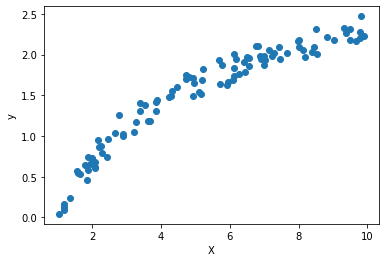

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Generate 100 iid samples X
X = np.random.uniform(1, 10, 100)

# Calculate corresponding y values
y = np.log(X) + np.random.normal(0, 0.1, 100)

# KNN regression for K = 1, 3, 50
for k in [1, 3, 50]:
    y_pred = []
    for x_test in [1, 3, 5, 7, 9]:
        # Calculate distances between test point and training points
        distances = np.abs(X - x_test)
        # Find k nearest neighbors
        k_neighbors = X[np.argsort(distances)[:k]]
        # Average y values of k nearest neighbors to get y_pred
        y_pred.append(np.mean(y[np.argsort(distances)[:k]]))
    
    print(f"K = {k}: {y_pred}")

# Plot original y vs X
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# **K neighbors influence is inversely proportional to the distance from points**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Generate 100 iid samples X
X = np.random.uniform(1, 10, 100)

# Calculate corresponding y values
y = np.log(X) + np.random.normal(0, 0.1, 100)

# KNN regression for K = 1, 3, 50
for k in [1, 3, 50]:
    print(f"K = {k}:")
    y_pred = []
    for x_test in [1, 3, 5, 7, 9]:
        # Calculate distances between test point and training points
        distances = np.abs(X - x_test)
        # Find k nearest neighbors
        k_neighbors = X[np.argsort(distances)[:k]]
        # Average y values of k nearest neighbors to get y_pred
        y_pred.append(np.mean(y[np.argsort(distances)[:k]]))
        
    print(f"Unweighted: {[(x_test, y) for x_test, y in zip([1, 3, 5, 7, 9], y_pred)]}")

# Weighted KNN regression for K = 1, 3, 50
for k in [1, 3, 50]:
    print(f"K = {k}:")
    y_pred = []
    for x_test in [1, 3, 5, 7, 9]:
        # Calculate distances between test point and training points
        distances = np.abs(X - x_test)
        # Find k nearest neighbors
        k_neighbors = X[np.argsort(distances)[:k]]
        # Calculate weights for k nearest neighbors
        weights = 1/distances[np.argsort(distances)[:k]]
        # Weighted average y values of k nearest neighbors to get y_pred
        y_pred.append(np.average(y[np.argsort(distances)[:k]], weights=weights))
        
    print(f"Weighted: {[(x_test, y) for x_test, y in zip([1, 3, 5, 7, 9], y_pred)]}")

# Plot original y vs X
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

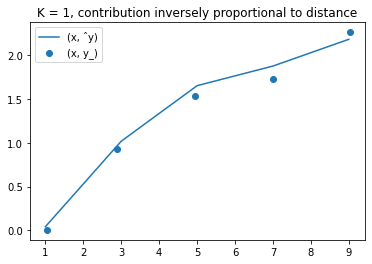

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to obtain the y values
def y_value(x):
  return np.log(x) + np.random.normal(0, 0.1, x.shape[0])

# Function to calculate ˆy values using K-NN regression
def knn_regression(x, x_samples, y_samples, k, weighted=True):
    distances = np.abs(x_samples[None, :] - x[:, None])
    sorted_indices = np.argsort(distances, axis=1)
    y_pred = np.zeros(x.shape[0])
    for i, indices in enumerate(sorted_indices):
      y_k = y_samples[indices[:k]]
      if weighted:
        weights = 1 / distances[i, indices[:k]]
        y_pred[i] = np.average(y_k, weights=weights)
      else:
          y_pred[i] = np.mean(y_k)
    return y_pred

# Obtain N = 100 iid samples x1, x2, ···of X uniformly randomly between 1 and 10
np.random.seed(0)
N = 100
x_samples = np.random.uniform(1, 10, N)
y_samples = y_value(x_samples)

#X values at which ˆy values are obtained
x = np.array([1, 3, 5, 7, 9])

# Plot for K = 1, contribution inversely proportional to distance
y_pred_k1 = knn_regression(x, x_samples, y_samples, k=1)
x_closest_k1 = x_samples[np.argmin(np.abs(x_samples[:, None] - x), axis=0)]
y_closest_k1 = y_value(x_closest_k1)

plt.scatter(x_closest_k1, y_closest_k1, label='(x, y_)')
plt.plot(x, y_pred_k1, label='(x, ˆy)')
plt.legend()
plt.title('K = 1, contribution inversely proportional to distance')
plt.show()

# **First Scheme**

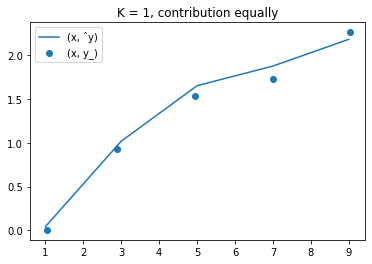

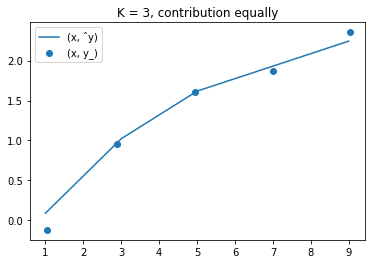

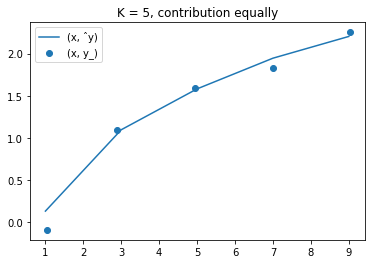

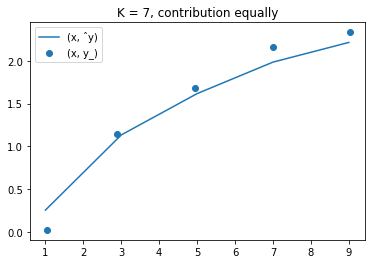

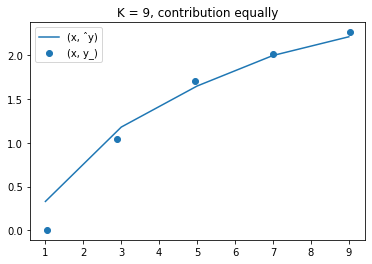

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to obtain the y values
def y_value(x):
    return np.log(x) + np.random.normal(0, 0.1, x.shape[0])

# Function to calculate ˆy values using K-NN regression
def knn_regression(x, x_samples, y_samples, k, weighted=False):
    distances = np.abs(x_samples[None, :] - x[:, None])
    sorted_indices = np.argsort(distances, axis=1)
    y_pred = np.zeros(x.shape[0])
    for i, indices in enumerate(sorted_indices):
        y_k = y_samples[indices[:k]]
        if weighted:
            weights = 1 / distances[i, indices[:k]]
            y_pred[i] = np.average(y_k, weights=weights)
        else:
            y_pred[i] = np.mean(y_k)
    return y_pred

# Obtain N = 100 iid samples x1, x2, ···of X uniformly randomly between 1 and 10
np.random.seed(0)
N = 100
x_samples = np.random.uniform(1, 10, N)
y_samples = y_value(x_samples)

# X values at which ˆy values are obtained
x = np.array([1, 3, 5, 7, 9])

# Plot for K = 1, contribution equally
y_pred_k1 = knn_regression(x, x_samples, y_samples, k=1)
x_closest_k1 = x_samples[np.argmin(np.abs(x_samples[:, None] - x), axis=0)]
y_closest_k1 = y_value(x_closest_k1)

plt.scatter(x_closest_k1, y_closest_k1, label='(x, y_)')
plt.plot(x, y_pred_k1, label='(x, ˆy)')
plt.legend()
plt.title('K = 1, contribution equally')
plt.show()

# Plot for K = 3, contribution equally
y_pred_k3 = knn_regression(x, x_samples, y_samples, k=3)
x_closest_k3 = x_samples[np.argmin(np.abs(x_samples[:, None] - x), axis=0)]
y_closest_k3 = y_value(x_closest_k3)

plt.scatter(x_closest_k3, y_closest_k3, label='(x, y_)')
plt.plot(x, y_pred_k3, label='(x, ˆy)')
plt.legend()
plt.title('K = 3, contribution equally')
plt.show()

# Plot for K = 5, contribution equally
y_pred_k5 = knn_regression(x, x_samples, y_samples, k=5)
x_closest_k5 = x_samples[np.argmin(np.abs(x_samples[:, None] - x), axis=0)]
y_closest_k5 = y_value(x_closest_k5)

plt.scatter(x_closest_k5, y_closest_k5, label='(x, y_)')
plt.plot(x, y_pred_k5, label='(x, ˆy)')
plt.legend()
plt.title('K = 5, contribution equally')
plt.show()

# Plot for K = 7, contribution equally
y_pred_k7 = knn_regression(x, x_samples, y_samples, k=7)
x_closest_k7 = x_samples[np.argmin(np.abs(x_samples[:, None] - x), axis=0)]
y_closest_k7 = y_value(x_closest_k7)

plt.scatter(x_closest_k7, y_closest_k7, label='(x, y_)')
plt.plot(x, y_pred_k7, label='(x, ˆy)')
plt.legend()
plt.title('K = 7, contribution equally')
plt.show()

# Plot for K = 9, contribution equally
y_pred_k9 = knn_regression(x, x_samples, y_samples, k=9)
x_closest_k9 = x_samples[np.argmin(np.abs(x_samples[:, None] - x), axis=0)]
y_closest_k9 = y_value(x_closest_k9)

plt.scatter(x_closest_k9, y_closest_k9, label='(x, y_)')
plt.plot(x, y_pred_k9, label='(x, ˆy)')
plt.legend()
plt.title('K = 9, contribution equally')
plt.show()

# **Second Scheme**

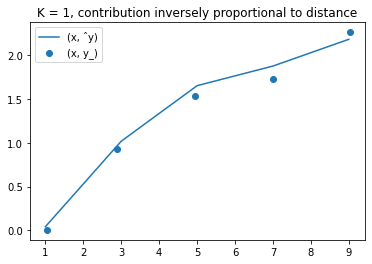

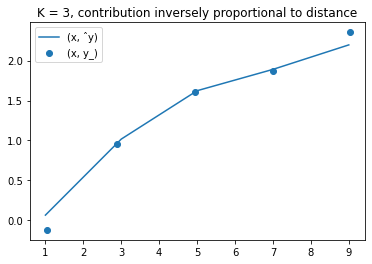

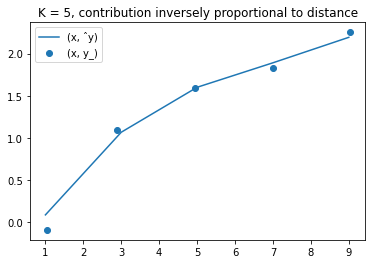

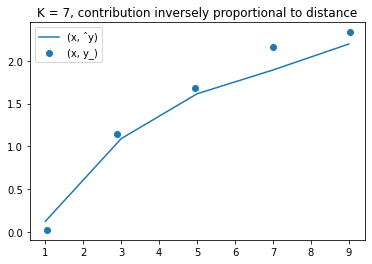

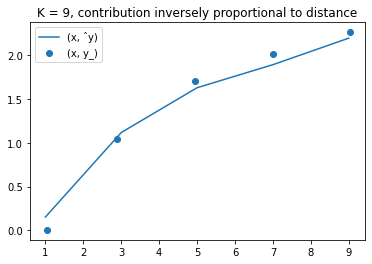

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to obtain the y values
def y_value(x):
  return np.log(x) + np.random.normal(0, 0.1, x.shape[0])

# Function to calculate ˆy values using K-NN regression
def knn_regression(x, x_samples, y_samples, k, weighted=True):
    distances = np.abs(x_samples[None, :] - x[:, None])
    sorted_indices = np.argsort(distances, axis=1)
    y_pred = np.zeros(x.shape[0])
    for i, indices in enumerate(sorted_indices):
      y_k = y_samples[indices[:k]]
      if weighted:
        weights = 1 / distances[i, indices[:k]]
        y_pred[i] = np.average(y_k, weights=weights)
      else:
          y_pred[i] = np.mean(y_k)
    return y_pred

# Obtain N = 100 iid samples x1, x2, ···of X uniformly randomly between 1 and 10
np.random.seed(0)
N = 100
x_samples = np.random.uniform(1, 10, N)
y_samples = y_value(x_samples)

#X values at which ˆy values are obtained
x = np.array([1, 3, 5, 7, 9])

# Plot for K = 1, contribution inversely proportional to distance
y_pred_k1 = knn_regression(x, x_samples, y_samples, k=1)
x_closest_k1 = x_samples[np.argmin(np.abs(x_samples[:, None] - x), axis=0)]
y_closest_k1 = y_value(x_closest_k1)

plt.scatter(x_closest_k1, y_closest_k1, label='(x, y_)')
plt.plot(x, y_pred_k1, label='(x, ˆy)')
plt.legend()
plt.title('K = 1, contribution inversely proportional to distance')
plt.show()

# Plot for K = 3, contribution inversely proportional to distance
y_pred_k3 = knn_regression(x, x_samples, y_samples, k=3)
x_closest_k3 = x_samples[np.argmin(np.abs(x_samples[:, None] - x), axis=0)]
y_closest_k3 = y_value(x_closest_k3)

plt.scatter(x_closest_k3, y_closest_k3, label='(x, y_)')
plt.plot(x, y_pred_k3, label='(x, ˆy)')
plt.legend()
plt.title('K = 3, contribution inversely proportional to distance')
plt.show()

# Plot for K = 5, contribution inversely proportional to distance
y_pred_k5 = knn_regression(x, x_samples, y_samples, k=5)
x_closest_k5 = x_samples[np.argmin(np.abs(x_samples[:, None] - x), axis=0)]
y_closest_k5 = y_value(x_closest_k5)

plt.scatter(x_closest_k5, y_closest_k5, label='(x, y_)')
plt.plot(x, y_pred_k5, label='(x, ˆy)')
plt.legend()
plt.title('K = 5, contribution inversely proportional to distance')
plt.show()

# Plot for K = 7, contribution inversely proportional to distance
y_pred_k7 = knn_regression(x, x_samples, y_samples, k=7)
x_closest_k7 = x_samples[np.argmin(np.abs(x_samples[:, None] - x), axis=0)]
y_closest_k7 = y_value(x_closest_k7)

plt.scatter(x_closest_k7, y_closest_k7, label='(x, y_)')
plt.plot(x, y_pred_k7, label='(x, ˆy)')
plt.legend()
plt.title('K = 7, contribution inversely proportional to distance')
plt.show()

# Plot for K = 9, contribution inversely proportional to distance
y_pred_k9 = knn_regression(x, x_samples, y_samples, k=9)
x_closest_k9 = x_samples[np.argmin(np.abs(x_samples[:, None] - x), axis=0)]
y_closest_k9 = y_value(x_closest_k9)

plt.scatter(x_closest_k9, y_closest_k9, label='(x, y_)')
plt.plot(x, y_pred_k9, label='(x, ˆy)')
plt.legend()
plt.title('K = 9, contribution inversely proportional to distance')
plt.show()

This code is an implementation of K-Nearest Neighbor (K-NN) regression. The main purpose of the code is to estimate the value of a response variable y for a given predictor variable x, based on the values of x and y for a set of training data.

The code first defines two functions:

y_value(x): which generates random values for y based on the values of x using a logarithmic function and adding normal noise.

knn_regression(x, x_samples, y_samples, k, weighted=False): which calculates the estimated value of y (y_pred) for a given x using K-NN regression. The function first computes the distances between x and the training samples, sorts the distances to get the closest k samples, and then calculates the average value of y for the closest k samples as the estimated value of y. The optional argument weighted can be set to True to use weighted average, where the weights are proportional to the inverse of the distances.

The code then generates N=100 samples of x and y from a uniform distribution between 1 and 10, and calculates the estimated values of y for five values of x using K-NN regression with k=1. Finally, the code plots the estimated y values along with the closest x and y training samples, and displays the plot.



import numpy as np: This line imports the NumPy library as np. NumPy is used for numerical computations and array operations in the code.

import matplotlib.pyplot as plt: This line imports the pyplot module of the Matplotlib library as plt. Matplotlib is used for plotting the results of the code.

import pandas as pd: This line imports the Pandas library as pd. Pandas is not used in the code, so this line can be deleted.

def y_value(x):: This line defines the y_value function, which generates values for y based on the values of x.

return np.log(x) + np.random.normal(0, 0.1, x.shape[0]): This line returns the logarithm of x plus random normal noise with mean 0 and standard deviation 0.1. The shape of the noise is determined by the shape of x.

def knn_regression(x, x_samples, y_samples, k, weighted=False):: This line defines the knn_regression function, which calculates the estimated values of y using K-NN regression.

distances = np.abs(x_samples[None, :] - x[:, None]): This line calculates the absolute differences between x and each of the x training samples, and stores the results in a 2D array distances.

sorted_indices = np.argsort(distances, axis=1): This line sorts the distances along the rows (axis=1) and returns the indices of the sorted distances.

y_pred = np.zeros(x.shape[0]): This line initializes an array y_pred of zeros with the same number of elements as x.

for i, indices in enumerate(sorted_indices):: This line starts a for loop that iterates over the sorted indices of distances. The variable i is the index of the current x value, and indices is the list of indices of the closest k samples for the current x.

y_k = y_samples[indices[:k]]: This line selects the y values for the closest k samples for the current x.

if weighted:: This line starts a conditional statement that checks if the weighted argument is set to True.

weights = 1 / distances[i, indices[:k]]: This line calculates the weights as the inverse of the distances between the current x and the closest k samples.

y_pred[i] = np.average(y_k, weights=weights): This line calculates the weighted average of y_k using the weights, and stores the result in y_pred[i].

else:: This line starts the else branch of the conditional statement.

y_pred[i] = np.mean(y_k): This line calculates the average of y_k, and stores the result in y_pred[i].

return y_pred

